In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool

import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
from scipy import stats
from minepy import MINE

path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"
seconds_to_Myr = 3.15576e+16

In [2]:
df15 = pd.read_csv(path_results + f"10-15kpc_dynamic_data_v2.csv", sep = ",", index_col = 0)
df10 = pd.read_csv(path_results + f"5-10kpc_dynamic_data_v2.csv", sep = ",", index_col = 0)
#df5 = pd.read_csv(path_results + f"0-5kpc_dynamic_data.csv", sep = ",", index_col = 0)


In [3]:
from scipy import stats
from minepy import MINE
mine = MINE(alpha=0.6, c=15, est="mic_approx")
def print_stats(mine):
    print ("MIC", mine.mic())
    print ("MAS", mine.mas())
    print ("MEV", mine.mev())
    print ("MCN (eps=0)", mine.mcn(0))
    print ("MCN (eps=1-MIC)", mine.mcn_general())
    print ("GMIC", mine.gmic())
    print ("TIC", mine.tic())



In [11]:
df15

,Lookback,Z,VZ,Bending,Breathing,density,BendingM2,BreathingM2,densityM2,DM,Gas,Stars,Satelites,All,DM_out,DM_inner
0,7.641375,0.417911,13.723418,11.615044,2.350567,0.168309,5.189590,8.228859,5.189590,43.949140,66.178707,8.257057,0.024477,50.797960,13.618917,99.988245
1,7.596713,0.485275,11.184360,9.992885,1.443388,0.168344,3.474554,8.272188,3.474554,35.367123,44.126771,8.355391,0.033394,30.958294,10.334437,88.725212
2,7.566684,0.473804,10.339379,9.735290,1.315938,0.206370,3.410600,7.794048,3.410600,26.960473,28.257479,10.157289,0.041124,21.466601,10.689419,107.234534
3,7.533391,0.448126,10.763557,9.971584,1.416065,0.211574,3.773289,8.339641,3.773289,36.815722,22.741099,8.261071,0.051349,21.375473,11.306639,166.005332
4,7.482980,0.349780,11.937704,11.275937,1.493219,0.134932,3.497443,7.419509,3.497443,27.224568,37.153402,7.736412,0.066845,21.566757,8.973001,193.424444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.140454,0.054673,1.045432,0.852107,1.473311,0.337612,0.804046,4.382034,0.804046,14.382300,26.288741,8.407128,0.541135,27.111136,3.825295,122.089566
221,0.100925,0.055629,1.069355,1.021869,1.461848,0.317252,0.738803,4.346010,0.738803,16.990018,24.561643,6.741364,0.493460,23.458476,4.901063,128.646059
222,0.079098,0.060855,1.194949,1.065165,1.255009,0.312423,0.837958,4.336350,0.837958,17.210351,30.339461,9.920320,0.449974,25.218150,5.132369,106.997059
223,0.057232,0.065249,1.187703,1.078219,1.306889,0.306374,0.881425,4.263980,0.881425,10.877019,32.111231,6.946177,0.400456,22.518674,5.140990,95.056340


In [21]:
def calculate_correlation (var1, var2, df):
   # print(stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).pvalue)
 #   if stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).pvalue > 0.05:
  #      return 0
  #  else:
    #    return stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).correlation
    return stats.pearsonr(df[f"{var1}"],df[f"{var2}"])[0]

def calculate_match (var1, var2, df):
   # print(stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).pvalue)
    cor_res = stats.pearsonr(df[f"{var1}"],df[f"{var2}"])
    #print(cor_res)
    if cor_res [1]< 0.05:
        if np.abs(cor_res[0])> 0.4:
            return cor_res[0]
        else: 
            return np.NaN
    else:
        return np.NaN
    

In [28]:
for  i,number in enumerate(np.array(df15["density"])):
    if np.isnan(number)== True:
        print(f"Nan in position {i}")

In [5]:
variables = ["Bending", "Breathing", "density","BendingM2", "BreathingM2", "densityM2","DM", "Gas", "DM_out", "DM_inner"]
rings = ["10", "15"]
correlations = {}
match = {}
#generation of dictionary
for ring in rings:
    for var1 in variables:
        for var2 in variables:
            correlations[f"{var1}_{var2}_{ring}"] = []
            match[f"{var1}_{var2}_{ring}"] = []
window = 0.8
number_snapshots = []
lookback = []
for lb in df15["Lookback"]:
  #  print(lb)
    lookback.append(lb)
    df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    number_snapshots.append(len(df_w15))
    for ring in rings:
        for var1 in variables:
            for var2 in variables:
                
              #  print(f"calculatin in ring {ring}, variables {var1}, {var2}")
                if ring == '5':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w5))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w5))
                elif ring == '10':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w10))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                elif ring == '15':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w15))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))
                    
    
print("done!")  
print(f"This window has a mean of {np.mean(number_snapshots)} per window to compute the statistics")

done!
This window has a mean of 23.106666666666666 per window to compute the statistics


In [6]:
colors = [ "dodgerblue","mediumblue", "violet","purple","limegreen",  "darkgreen", "orangered","firebrick"]

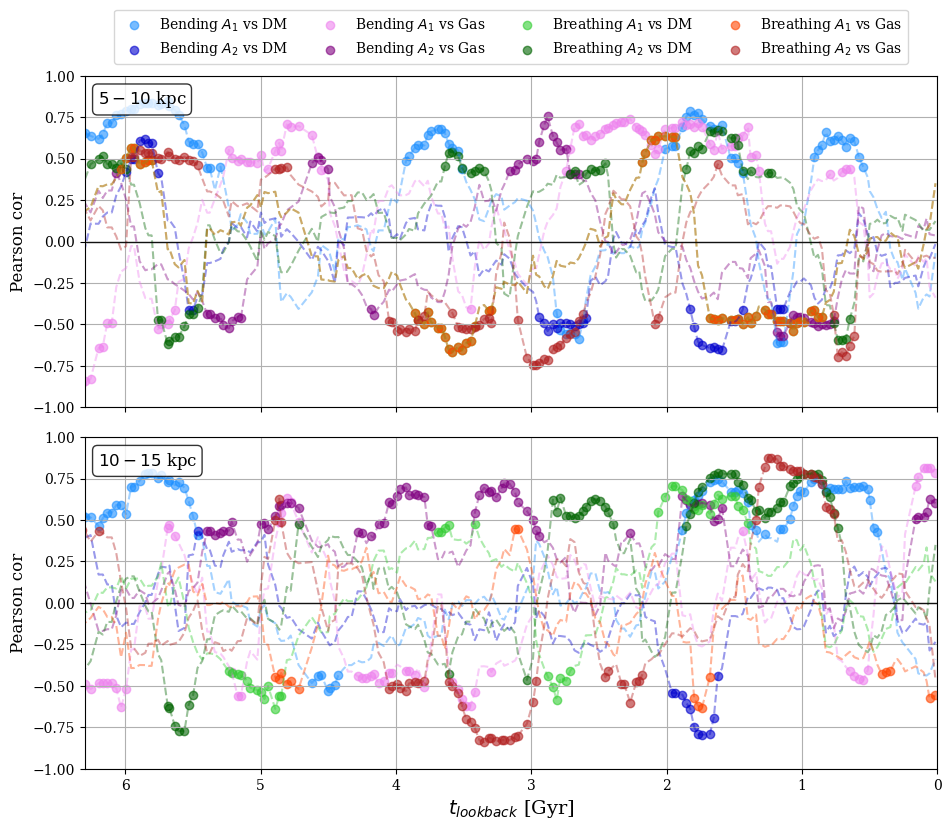

In [12]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (11,9))
fig.subplots_adjust(hspace=0.09, wspace=0)
transp = 0.4
transp2 = 0.6
#ax[0].set_title("5-10 kpc")


ax[0].plot(lookback,correlations["Bending_DM_10"],label = "",ls  = "--", alpha =transp, color = colors[0])
ax[0].scatter(lookback,match["Bending_DM_10"],marker = "o",label = "Bending $A_{1}$ vs DM",color = colors[0],alpha =transp2 )


ax[0].plot(lookback,correlations["BendingM2_DM_10"],label = "",ls  = "--", alpha =transp,color = colors[1])
ax[0].scatter(lookback,match["BendingM2_DM_10"],marker = "o",label = "Bending $A_{2}$ vs DM",color = colors[1],alpha =transp2)

ax[0].plot(lookback,correlations["Bending_Gas_10"],label = "",ls  = "--", alpha =transp,color = colors[2])
ax[0].scatter(lookback,match["Bending_Gas_10"],marker = "o",label = "Bending $A_{1}$ vs Gas",color = colors[2],alpha =transp2)


ax[0].plot(lookback,correlations["BendingM2_Gas_10"],label = "",ls  = "--", alpha =transp,color = colors[3])
ax[0].scatter(lookback,match["BendingM2_Gas_10"],marker = "o",label = "Bending $A_{2}$ vs Gas",color = colors[3],alpha =transp2)





ax[0].plot(lookback,correlations["Breathing_DM_10"],label = "",ls  = "--", alpha =transp,color = colors[4])
ax[0].scatter(lookback,match["Breathing_DM_10"],marker = "o",label = "Breathing $A_{1}$ vs DM",color = colors[4],alpha =transp2)

ax[0].plot(lookback,correlations["BreathingM2_DM_10"],label = "",ls  = "--", alpha =transp,color = colors[5])
ax[0].scatter(lookback,match["BreathingM2_DM_10"],marker = "o",label = "Breathing $A_{2}$ vs DM",color = colors[5],alpha =transp2)


ax[0].plot(lookback,correlations["Breathing_DM_10"],label = "",ls  = "--", alpha =transp,color = colors[6])
ax[0].scatter(lookback,match["Breathing_DM_10"],marker = "o",label = "Breathing $A_{1}$ vs Gas",color = colors[6],alpha =transp2)

ax[0].plot(lookback,correlations["BreathingM2_Gas_10"],label = "",ls  = "--", alpha =transp,color = colors[7])
ax[0].scatter(lookback,match["BreathingM2_Gas_10"],marker = "o",label = "Breathing $A_{2}$ vs Gas",color = colors[7],alpha =transp2)



ax[0].grid()
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.22),ncol=4, fancybox=True)
#ax[1].set_title("10-15 kpc")


ax[1].plot(lookback,correlations["Bending_DM_15"],label = "",ls  = "--", alpha =transp, color = colors[0])
ax[1].scatter(lookback,match["Bending_DM_15"],marker = "o",label = "Bending $A_{1}$ vs DM", color = colors[0],alpha =transp2)

ax[1].plot(lookback,correlations["BendingM2_DM_15"],label = "",ls  = "--", alpha =transp, color = colors[1])
ax[1].scatter(lookback,match["BendingM2_DM_15"],marker = "o",label = "Bending $A_{2}$ vs DM", color = colors[1],alpha =transp2)

ax[1].plot(lookback,correlations["Bending_Gas_15"],label = "",ls  = "--", alpha =transp, color = colors[2])
ax[1].scatter(lookback,match["Bending_Gas_15"],marker = "o",label = "Bending $A_{1}$ vs Gas", color = colors[2],alpha =transp2)

ax[1].plot(lookback,correlations["BendingM2_Gas_15"],label = "",ls  = "--", alpha =transp, color = colors[3])
ax[1].scatter(lookback,match["BendingM2_Gas_15"],marker = "o",label = "Bending $A_{2}$ vs Gas", color = colors[3],alpha =transp2)



ax[1].plot(lookback,correlations["Breathing_DM_15"],label = "",ls  = "--", alpha =transp, color = colors[4])
ax[1].scatter(lookback,match["Breathing_DM_15"],marker = "o",label = "Breathing_DM", color = colors[4],alpha =transp2)


ax[1].plot(lookback,correlations["BreathingM2_DM_15"],label = "",ls  = "--", alpha =transp, color = colors[5])
ax[1].scatter(lookback,match["BreathingM2_DM_15"],marker = "o",label = "BreathingM2_DM", color = colors[5],alpha =transp2)


ax[1].plot(lookback,correlations["Breathing_Gas_15"],label = "",ls  = "--", alpha =transp, color = colors[6])
ax[1].scatter(lookback,match["Breathing_Gas_15"],marker = "o",label = "Breathing_DM", color = colors[6],alpha =transp2)


ax[1].plot(lookback,correlations["BreathingM2_Gas_15"],label = "",ls  = "--", alpha =transp, color = colors[7])
ax[1].scatter(lookback,match["BreathingM2_Gas_15"],marker = "o",label = "BreathingM2_DM", color = colors[7],alpha =transp2)


#ax[0].set_xlim(6.3,0)
#ax[0].set_ylim(0,1)
ax[1].set_xlim(6.3, 0)
ax[1].set_ylim(-1,1)

ax[1].grid()
#ax[1].legend(bbox_to_anchor = (1., 0.75))
ax[1].set_xlabel("$t_{lookback}$ [Gyr]", fontsize = 14)
ax[1].set_ylabel('Pearson cor', fontsize = 12)
ax[0].set_ylabel('Pearson cor', fontsize = 12)
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax[0].text(0.015, 0.96,"$5-10$ kpc", transform=ax[0].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax[1].text(0.015, 0.96,"$10-15$ kpc", transform=ax[1].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax[0].tick_params(labelsize = 10)
ax[1].tick_params(labelsize = 10)

ax[0].axhline(y = 0, color = 'black', linestyle = '-', alpha = 0.9, lw = 1)
ax[1].axhline(y = 0, color = 'black', linestyle = '-', alpha = 0.9, lw = 1)
#plt.show()   #
plt.savefig("../results/correlations_Bending_Breathing.png", dpi = 100, facecolor = "white", bbox_inches = "tight")

In [ ]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

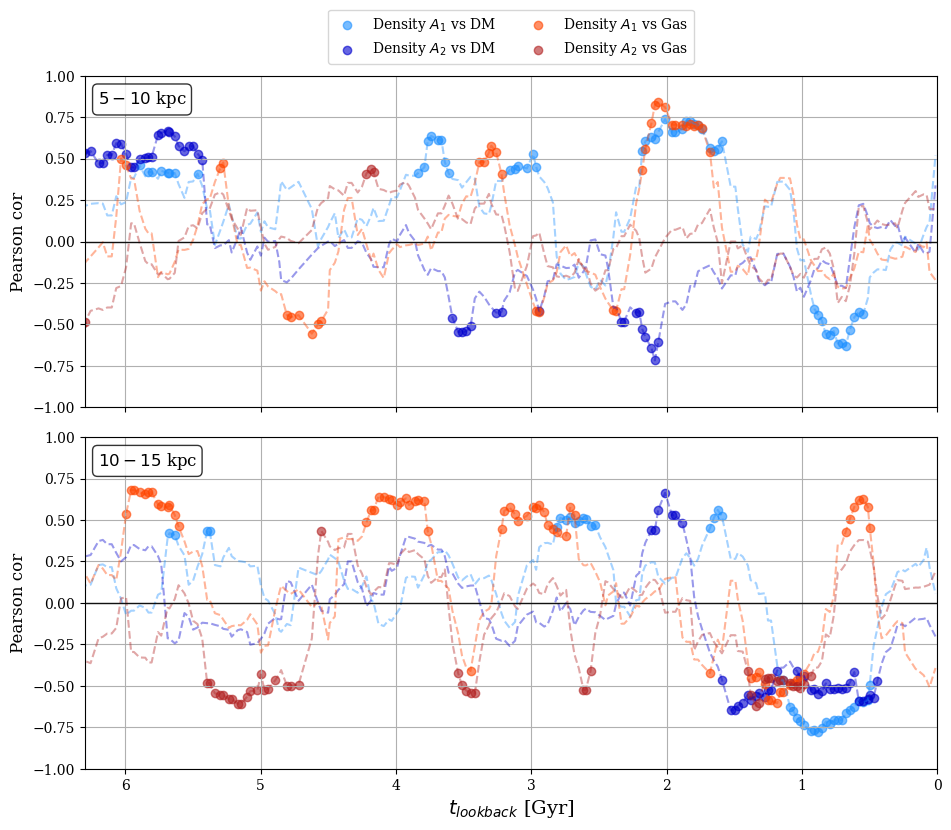

In [14]:
colors = [ "dodgerblue","mediumblue", "limegreen",  "darkgreen",  "violet","purple", "orangered","firebrick"]
plt.rc('font', family='serif')
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (11,9))
fig.subplots_adjust(hspace=0.09, wspace=0)
transp = 0.4
transp2 = 0.6



ax[0].plot(lookback,correlations["density_DM_10"],label = "",ls  = "--", alpha =transp, color = colors[0])
ax[0].scatter(lookback,match["density_DM_10"],marker = "o",label = "Density $A_{1}$ vs DM", alpha =transp2,color = colors[0])
ax[0].plot(lookback,correlations["densityM2_DM_10"],label = "",ls  = "--", alpha =transp,color = colors[1])
ax[0].scatter(lookback,match["densityM2_DM_10"],marker = "o",label = "Density $A_{2}$ vs DM", alpha =transp2,color = colors[1])





ax[0].plot(lookback,correlations["density_Gas_10"],label = "",ls  = "--", alpha =transp,color = colors[6])
ax[0].scatter(lookback,match["density_Gas_10"],marker = "o",label = "Density $A_{1}$ vs Gas", alpha =transp2,color = colors[6])

ax[0].plot(lookback,correlations["densityM2_Gas_10"],label = "",ls  = "--", alpha =transp,color = colors[7])
ax[0].scatter(lookback,match["densityM2_Gas_10"],marker = "o",label = "Density $A_{2}$ vs Gas", alpha =transp2,color = colors[7])







ax[0].grid()
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.22),ncol=2, fancybox=True)


ax[1].plot(lookback,correlations["density_DM_15"],label = "",ls  = "--", alpha =transp,color = colors[0])
ax[1].scatter(lookback,match["density_DM_15"],marker = "o",label = "density_DM", alpha =transp2,color = colors[0])

ax[1].plot(lookback,correlations["densityM2_DM_15"],label = "",ls  = "--", alpha =transp,color = colors[1])
ax[1].scatter(lookback,match["densityM2_DM_15"],marker = "o",label = "densityM2_DM", alpha =transp2,color = colors[1])



ax[1].plot(lookback,correlations["density_Gas_15"],label = "",ls  = "--", alpha =transp,color = colors[6])
ax[1].scatter(lookback,match["density_Gas_15"],marker = "o",label = "density_Gas", alpha =transp2,color = colors[6])
ax[1].plot(lookback,correlations["densityM2_Gas_15"],label = "",ls  = "--", alpha =transp,color = colors[7])
ax[1].scatter(lookback,match["densityM2_Gas_15"],marker = "o",label = "densityM2_Gas", alpha =transp2,color = colors[7])

ax[1].set_xlim(6.3, 0)
ax[1].set_ylim(-1,1)

ax[1].grid()
#ax[1].legend(bbox_to_anchor = (1., 0.75))
ax[1].set_xlabel("$t_{lookback}$ [Gyr]", fontsize = 14)
ax[1].set_ylabel('Pearson cor', fontsize = 12)
ax[0].set_ylabel('Pearson cor', fontsize = 12)
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax[0].text(0.015, 0.96,"$5-10$ kpc", transform=ax[0].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax[1].text(0.015, 0.96,"$10-15$ kpc", transform=ax[1].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax[0].tick_params(labelsize = 10)
ax[1].tick_params(labelsize = 10)
ax[0].axhline(y = 0, color = 'black', linestyle = '-', alpha = 0.9, lw = 1)
ax[1].axhline(y = 0, color = 'black', linestyle = '-', alpha = 0.9, lw = 1)
#plt.show()   
plt.savefig("../results/correlations_density.png", dpi = 100, facecolor = "white", bbox_inches = "tight")

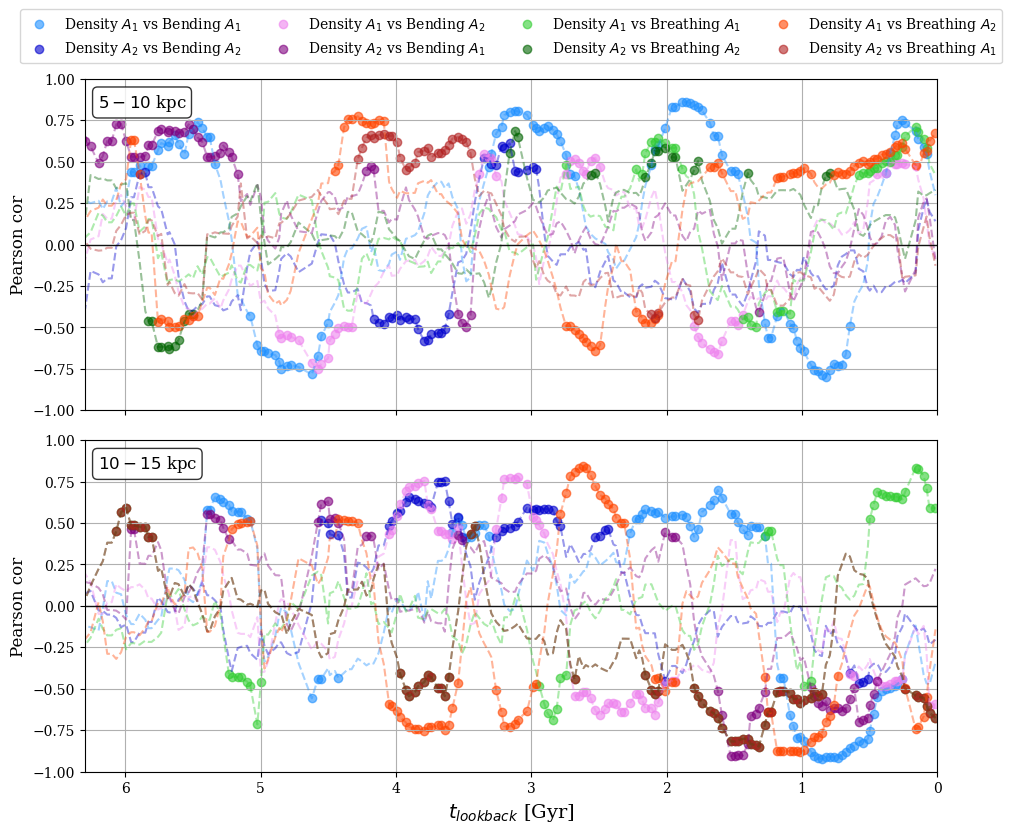

In [19]:
colors = [ "dodgerblue","mediumblue", "violet","purple","limegreen",  "darkgreen", "orangered","firebrick"]
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (11,9))
fig.subplots_adjust(hspace=0.09, wspace=0)
transp = 0.4
transp2 = 0.6


ax[0].plot(lookback,correlations["density_Bending_10"],label = "",ls  = "--", alpha =transp,color = colors[0])
ax[0].scatter(lookback,match["density_Bending_10"],marker = "o",label = "Density $A_{1}$ vs Bending $A_{1}$", alpha =transp2,color = colors[0])
ax[0].plot(lookback,correlations["densityM2_BendingM2_10"],label = "",ls  = "--", alpha =transp,color = colors[1])
ax[0].scatter(lookback,match["densityM2_BendingM2_10"],marker = "o",label = "Density $A_{2}$ vs Bending $A_{2}$", alpha =transp2,color = colors[1])


ax[0].plot(lookback,correlations["density_BendingM2_10"],label = "",ls  = "--", alpha =transp,color = colors[2])
ax[0].scatter(lookback,match["density_BendingM2_10"],marker = "o",label = "Density $A_{1}$ vs Bending $A_{2}$", alpha =transp2,color = colors[2])
ax[0].plot(lookback,correlations["densityM2_Bending_10"],label = "",ls  = "--", alpha =transp,color = colors[3])
ax[0].scatter(lookback,match["densityM2_Bending_10"],marker = "o",label = "Density $A_{2}$ vs Bending $A_{1}$", alpha =transp2,color = colors[3])

ax[0].plot(lookback,correlations["density_Breathing_10"],label = "",ls  = "--", alpha =transp,color = colors[4])
ax[0].scatter(lookback,match["density_Breathing_10"],marker = "o",label = "Density $A_{1}$ vs Breathing $A_{1}$", alpha =transp2,color = colors[4])
ax[0].plot(lookback,correlations["densityM2_BreathingM2_10"],label = "",ls  = "--", alpha =transp,color = colors[5])
ax[0].scatter(lookback,match["densityM2_BreathingM2_10"],marker = "o",label = "Density $A_{2}$ vs Breathing $A_{2}$", alpha =transp2,color = colors[5])


ax[0].plot(lookback,correlations["density_BreathingM2_10"],label = "",ls  = "--", alpha =transp,color = colors[6])
ax[0].scatter(lookback,match["density_BreathingM2_10"],marker = "o",label = "Density $A_{1}$ vs Breathing $A_{2}$", alpha =transp2,color = colors[6])
ax[0].plot(lookback,correlations["densityM2_Breathing_10"],label = "",ls  = "--", alpha =transp,color = colors[7])
ax[0].scatter(lookback,match["densityM2_Breathing_10"],marker = "o",label = "Density $A_{2}$ vs Breathing $A_{1}$", alpha =transp2,color = colors[7])


ax[0].grid()

ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.23),ncol=4, fancybox=True)


ax[1].plot(lookback,correlations["density_Bending_15"],label = "",ls  = "--", alpha =transp,color = colors[0])
ax[1].scatter(lookback,match["density_Bending_15"],marker = "o",label = "density_Bending", alpha =transp2,color = colors[0])
ax[1].plot(lookback,correlations["densityM2_BendingM2_15"],label = "",ls  = "--", alpha =transp,color = colors[1])
ax[1].scatter(lookback,match["densityM2_BendingM2_15"],marker = "o",label = "densityM2_BendingM2", alpha =transp2,color = colors[1])

ax[1].plot(lookback,correlations["density_BendingM2_15"],label = "",ls  = "--", alpha =transp,color = colors[2])
ax[1].scatter(lookback,match["density_BendingM2_15"],marker = "o",label = "density_BendingM2", alpha =transp2,color = colors[2])
ax[1].plot(lookback,correlations["densityM2_Bending_15"],label = "",ls  = "--", alpha =transp,color = colors[3])
ax[1].scatter(lookback,match["densityM2_Bending_15"],marker = "o",label = "densityM2_Bending", alpha =transp2,color = colors[3])


ax[1].plot(lookback,correlations["density_Breathing_15"],label = "",ls  = "--", alpha =transp,color = colors[4])
ax[1].scatter(lookback,match["density_Breathing_15"],marker = "o",label = "density_Breathing", alpha =transp2,color = colors[4])
ax[1].plot(lookback,correlations["densityM2_BreathingM2_15"],label = "",ls  = "--", alpha =transp,color = colors[5])
ax[1].scatter(lookback,match["densityM2_BreathingM2_15"],marker = "o",label = "densityM2_BreathingM2", alpha =transp2,color = colors[5])

ax[1].plot(lookback,correlations["density_BreathingM2_15"],label = "",ls  = "--", alpha =transp,color = colors[6])
ax[1].scatter(lookback,match["density_BreathingM2_15"],marker = "o",label = "density_BreathingM2", alpha =transp2,color = colors[6])
ax[1].plot(lookback,correlations["densityM2_BreathingM2_15"],label = "",ls  = "--", alpha =transp,color = colors[7])
ax[1].scatter(lookback,match["densityM2_BreathingM2_15"],marker = "o",label = "densityM2_Breathing", alpha =transp2,color = colors[7])
ax[1].set_xlim(6.3, 0)
ax[1].set_ylim(-1,1)

ax[1].grid()

ax[1].set_xlabel("$t_{lookback}$ [Gyr]", fontsize = 14)
ax[1].set_ylabel('Pearson cor', fontsize = 12)
ax[0].set_ylabel('Pearson cor', fontsize = 12)
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax[0].text(0.015, 0.96,"$5-10$ kpc", transform=ax[0].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax[1].text(0.015, 0.96,"$10-15$ kpc", transform=ax[1].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax[0].tick_params(labelsize = 10)
ax[1].tick_params(labelsize = 10)
ax[0].axhline(y = 0, color = 'black', linestyle = '-', alpha = 0.9, lw = 1)
ax[1].axhline(y = 0, color = 'black', linestyle = '-', alpha = 0.9, lw = 1)
#plt.show()   
plt.savefig("../results/correlations_density_vs_bending_breathing.png", dpi = 100, facecolor = "white", bbox_inches = "tight")

Text(0, 0.5, 'Pearson cor')

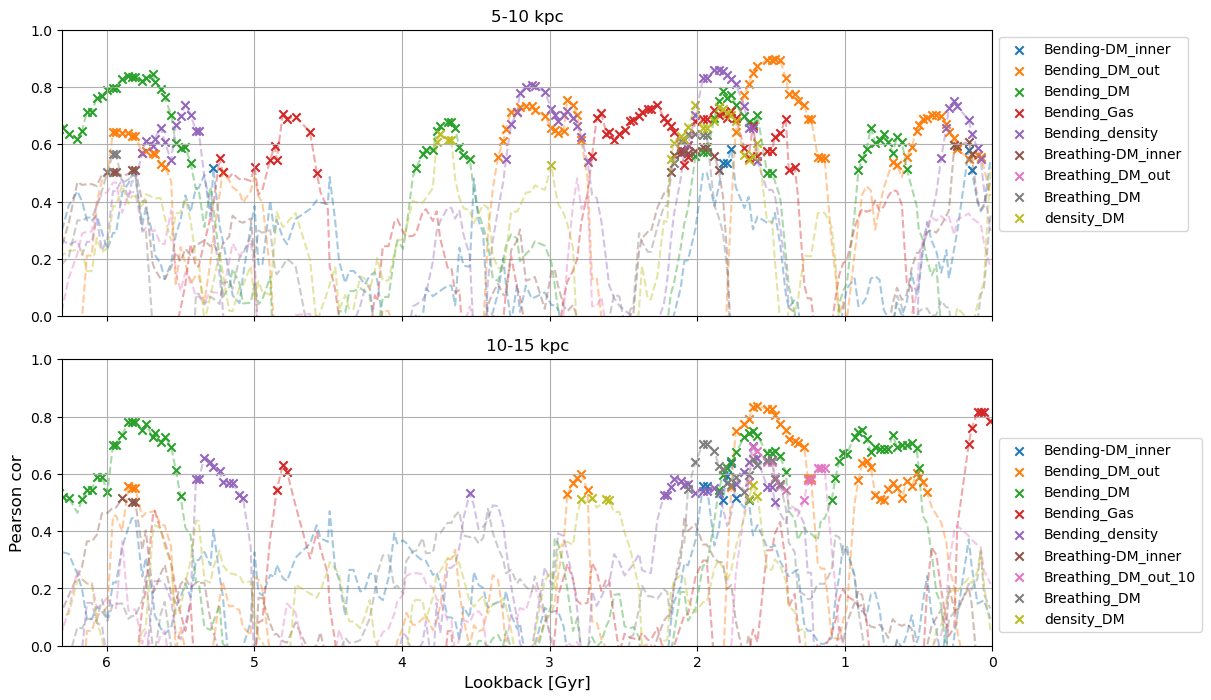

In [68]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (12,8))
fig.subplots_adjust(hspace=0.15, wspace=0)
transp = 0.4
ax[0].set_title("5-10 kpc")
#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[0].plot(lookback,correlations["Bending_DM_inner_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_DM_inner_10"],marker = "o",label = "Bending-DM_inner")

ax[0].plot(lookback,correlations["Bending_DM_out_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_DM_out_10"],marker = "o",label = "Bending_DM_out")

ax[0].plot(lookback,correlations["Bending_DM_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_DM_10"],marker = "o",label = "Bending_DM")

ax[0].plot(lookback,correlations["Bending_Gas_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_Gas_10"],marker = "o",label = "Bending_Gas")

ax[0].plot(lookback,correlations["Bending_density_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_density_10"],marker = "o",label = "Bending_density")



#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[0].plot(lookback,correlations["Breathing_DM_inner_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Breathing_DM_inner_10"],marker = "o",label = "Breathing-DM_inner")
ax[0].plot(lookback,correlations["Breathing_DM_out_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Breathing_DM_out_10"],marker = "o",label = "Breathing_DM_out")

ax[0].plot(lookback,correlations["Breathing_DM_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Breathing_DM_10"],marker = "o",label = "Breathing_DM")


ax[0].plot(lookback,correlations["density_DM_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["density_DM_10"],marker = "o",label = "density_DM")

ax[0].set_xlim(6.3,0)
ax[0].set_ylim(0,1)
ax[0].grid()
ax[0].legend(bbox_to_anchor = (1., 1))

ax[1].set_title("10-15 kpc")
ax[1].plot(lookback,correlations["Bending_DM_inner_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_DM_inner_15"],marker = "o",label = "Bending-DM_inner")

ax[1].plot(lookback,correlations["Bending_DM_out_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_DM_out_15"],marker = "o",label = "Bending_DM_out")

ax[1].plot(lookback,correlations["Bending_DM_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_DM_15"],marker = "o",label = "Bending_DM")

ax[1].plot(lookback,correlations["Bending_Gas_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_Gas_15"],marker = "o",label = "Bending_Gas")
ax[1].plot(lookback,correlations["Bending_density_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_density_15"],marker = "o",label = "Bending_density")


#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[1].plot(lookback,correlations["Breathing_DM_inner_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Breathing_DM_inner_15"],marker = "o",label = "Breathing-DM_inner")
ax[1].plot(lookback,correlations["Breathing_DM_out_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Breathing_DM_out_15"],marker = "o",label = "Breathing_DM_out_10")

ax[1].plot(lookback,correlations["Breathing_DM_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Breathing_DM_15"],marker = "o",label = "Breathing_DM")

ax[1].plot(lookback,correlations["density_DM_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["density_DM_15"],marker = "o",label = "density_DM")

ax[1].set_xlim(6.3, 0)
ax[1].set_ylim(0,1)

ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.75))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Pearson cor', fontsize = 12)
#plt.show()   
#plt.savefig("results/correlations_Z.png", dpi = 100, facecolor = "white")

In [41]:
variables = ["Z", "VZ", "density", "DM", "Gas","Stars","Satelites","All"]
rings = ["5", "10", "15"]
correlations = {}
match = {}
#generation of dictionary
for ring in rings:
    for var1 in variables:
        for var2 in variables:
            correlations[f"{var1}_{var2}_{ring}"] = []
            match[f"{var1}_{var2}_{ring}"] = []
window = 1
lookback = []
for lb in df15["Lookback"]:
  #  print(lb)
    lookback.append(lb)
    df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    df_w5 = df5[(df5["Lookback"]<lb + window/2)&(df5["Lookback"]>lb - window/2)]
    for ring in rings:
        for var1 in variables:
            for var2 in variables:
          #      print(f"calculatin in ring {ring}, variables {var1}, {var2}")
                if ring == '5':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w5))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w5))
                elif ring == '10':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w10))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                elif ring == '15':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w15))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))
                    
    
print("done!")            

done!


In [35]:
def calculate_MIC (var1, var2, df):
    mine.compute_score(df[f"{var1}"],df[f"{var2}"])
    return  mine.mic()

Text(0.5, 1.0, 'MIC 10-15 kpc')

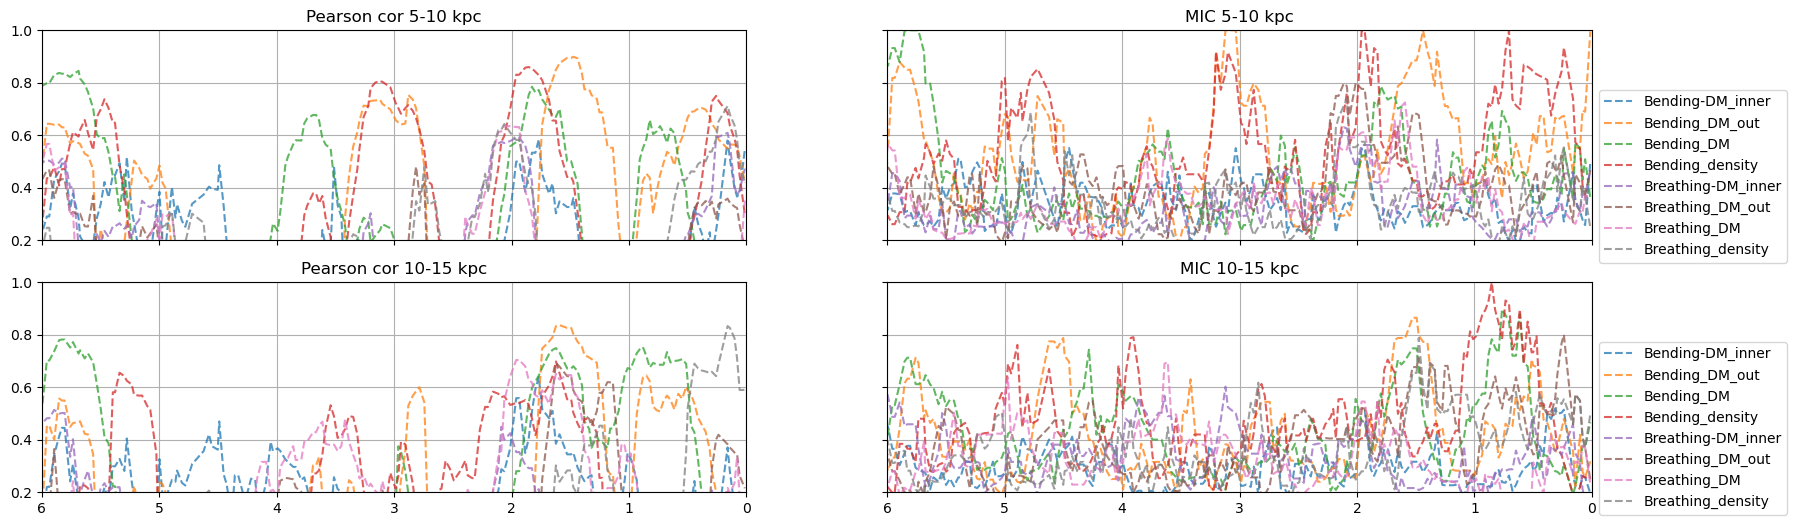

In [69]:

#window = 1
window = 0.8
#lookback = []

fig.subplots_adjust(hspace=0.15, wspace=0.1)
transp = 0.75
#for i, window in enumerate(windows):
variables = ["Bending", "Breathing", "density", "Gas","DM","DM_out", "DM_inner"]
rings = ["10", "15"]
correlations = {}
match = {}
MIC_data = {}

lookback = []
#generation of dictionary
for ring in rings:
    for var1 in variables:
        for var2 in variables:
            correlations[f"{var1}_{var2}_{ring}"] = []
            MIC_data[f"{var1}_{var2}_{ring}"] = []
            match[f"{var1}_{var2}_{ring}"] = []


for lb in df15["Lookback"]:
  #  print(lb)
    lookback.append(lb)
    df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    #df_w5 = df5[(df5["Lookback"]<lb + window/2)&(df5["Lookback"]>lb - window/2)]
    for ring in rings:
        for var1 in variables:
            for var2 in variables:

                if ring == '10':
                    MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w10))
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w10))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
              #      match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                elif ring == '15':
                    MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w15))
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w15))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))
             #       match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))

            

fig, ax = plt.subplots(len(rings),2, sharex=True, sharey=True,figsize = (20,6))          
for i, ring in enumerate(rings):            
    ax[i,0].plot(lookback,correlations[f"Bending_DM_inner_{ring}"],label = "Bending-DM_inner",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Bending_DM_out_{ring}"],label = "Bending_DM_out",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Bending_DM_{ring}"],label = "Bending_DM",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Bending_density_{ring}"],label = "Bending_density",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Breathing_DM_inner_{ring}"],label = "Breathing-DM_inner",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Breathing_DM_out_{ring}"],label = "Breathing_DM_out",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Breathing_DM_{ring}"],label = "Breathing_DM",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Breathing_density_{ring}"],label = "Bending_density",ls  = "--", alpha =transp)





    ax[i,0].set_xlim(6,0)
    ax[i,0].set_ylim(0.2,1)
    ax[i,0].grid()
    #ax[0].legend(bbox_to_anchor = (1., 0.6))

    ax[i,1].plot(lookback,MIC_data[f"Bending_DM_inner_{ring}"],label = f"Bending-DM_inner",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Bending_DM_out_{ring}"],label = f"Bending_DM_out",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Bending_DM_{ring}"],label = f"Bending_DM",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Bending_density_{ring}"],label = f"Bending_density",ls  = "--", alpha =transp)



    #ax.plot(lookback,cor_all_Z_10,label = "All-Z")
    ax[i,1].plot(lookback,MIC_data[f"Breathing_DM_inner_{ring}"],label = f"Breathing-DM_inner",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Breathing_DM_out_{ring}"],label = f"Breathing_DM_out",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Breathing_DM_{ring}"],label = f"Breathing_DM",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Breathing_density_{ring}"],label = f"Breathing_density",ls  = "--", alpha =transp)
    ax[i,1].set_xlim(6,0)
    ax[i,1].set_ylim(0.2,1)
    ax[i,1].grid()
    ax[i,1].legend(bbox_to_anchor = (1., 0.75))
    #   ax[i,1].set_xlabel('Lookback [Gyr]', fontsize = 12)
    #ax[1].set_ylabel('Spearman cor', fontsize = 12)
    #plt.savefig(path_results +"correlactions_windows.png", dpi = 100, bbox_inches='tight', facecolor = "white" )
ax[0,0].set_title("Pearson cor 5-10 kpc")
ax[0,1].set_title("MIC 5-10 kpc")
ax[1,0].set_title("Pearson cor 10-15 kpc")
ax[1,1].set_title("MIC 10-15 kpc")

Text(0.5, 1.0, 'MIC 10-15 kpc')

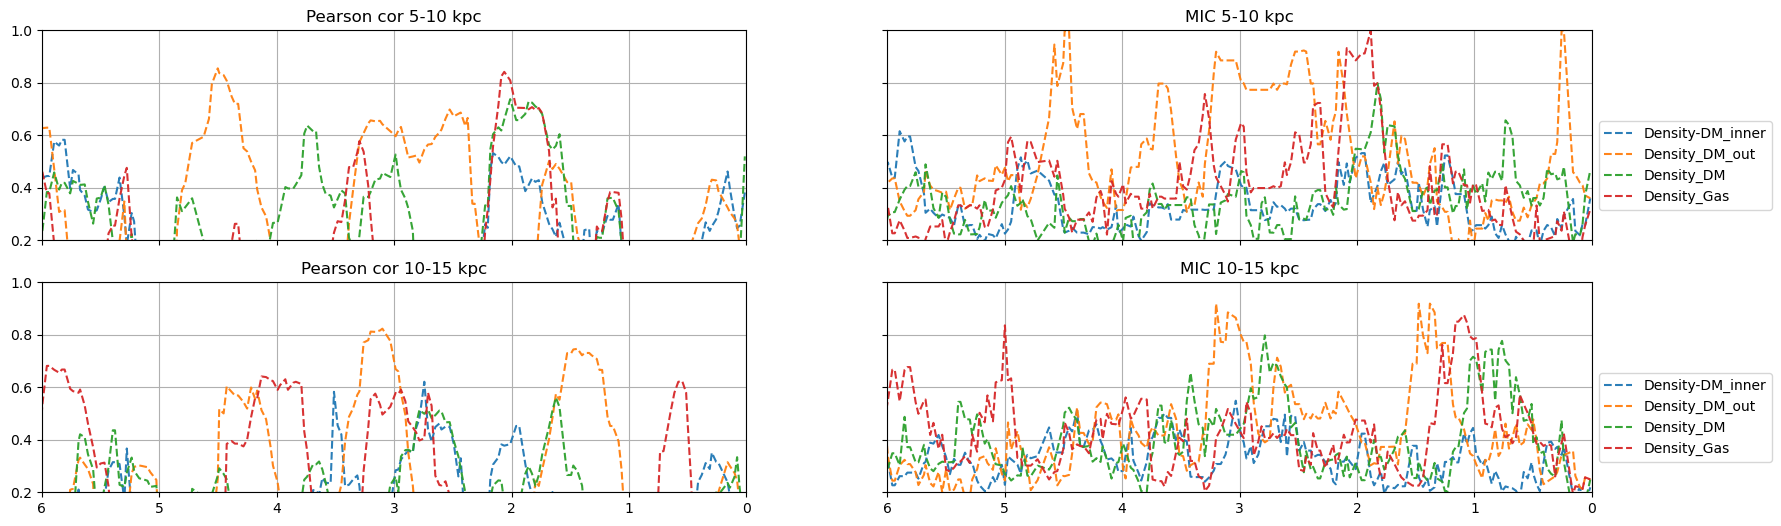

In [70]:
transp = 0.95
fig, ax = plt.subplots(len(rings),2, sharex=True, sharey=True,figsize = (20,6))          
for i, ring in enumerate(rings):            
    ax[i,0].plot(lookback,correlations[f"density_DM_inner_{ring}"],label = "Density-DM_inner",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"density_DM_out_{ring}"],label = "Density_DM_out",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"density_DM_{ring}"],label = "Density_DM",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"density_Gas_{ring}"],label = "Density_Gas",ls  = "--", alpha =transp)
 


   # ax[i,0].set_title(f"{window}Gyr Pearson cor {ring}")


    ax[i,0].set_xlim(6,0)
    ax[i,0].set_ylim(0.2,1)
    ax[i,0].grid()
    #ax[0].legend(bbox_to_anchor = (1., 0.6))

    ax[i,1].plot(lookback,MIC_data[f"density_DM_inner_{ring}"],label = "Density-DM_inner",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"density_DM_out_{ring}"],label = "Density_DM_out",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"density_DM_{ring}"],label = "Density_DM",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"density_Gas_{ring}"],label = "Density_Gas",ls  = "--", alpha =transp)


    ax[i,1].set_xlim(6,0)
    ax[i,1].set_ylim(0.2,1)
    ax[i,1].grid()
    ax[i,1].legend(bbox_to_anchor = (1., 0.6))
    #   ax[i,1].set_xlabel('Lookback [Gyr]', fontsize = 12)
    #ax[1].set_ylabel('Spearman cor', fontsize = 12)
    #plt.savefig(path_results +"correlactions_windows.png", dpi = 100, bbox_inches='tight', facecolor = "white" )
ax[0,0].set_title("Pearson cor 5-10 kpc")
ax[0,1].set_title("MIC 5-10 kpc")
ax[1,0].set_title("Pearson cor 10-15 kpc")
ax[1,1].set_title("MIC 10-15 kpc")

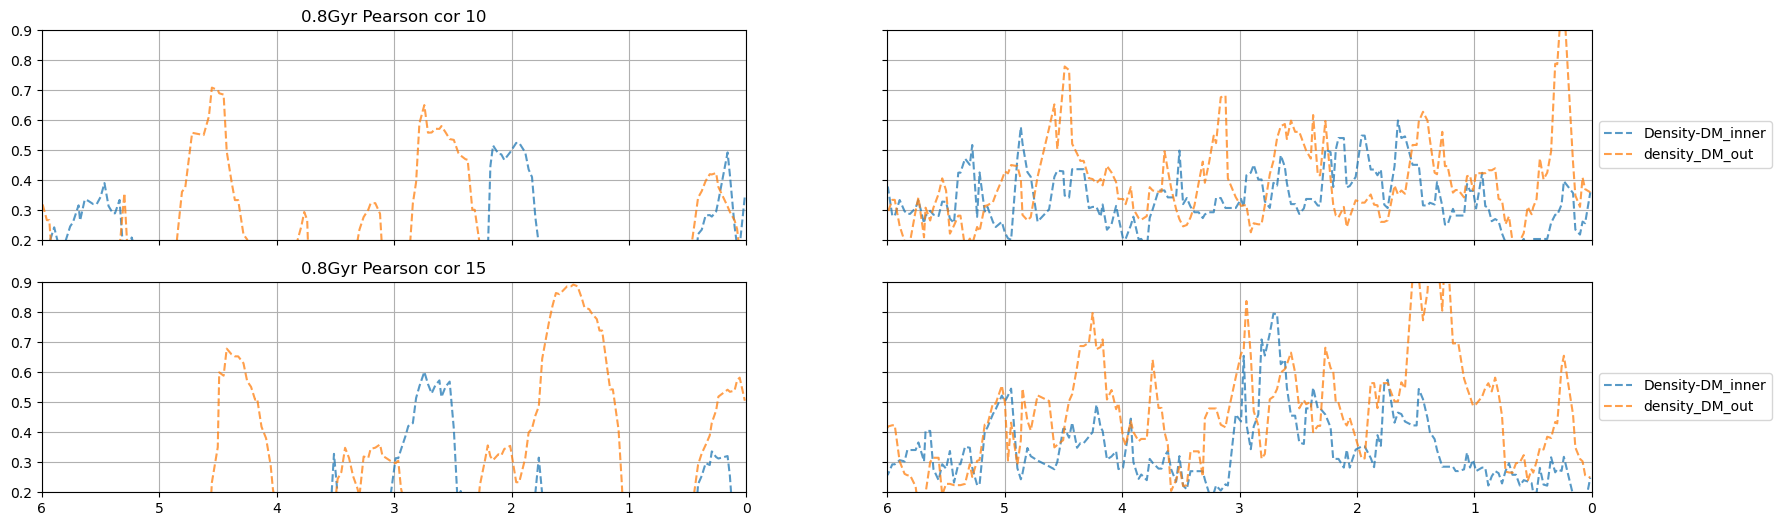

In [35]:

fig, ax = plt.subplots(len(rings),2, sharex=True, sharey=True,figsize = (20,6*len(windows)))          
for i, ring in enumerate(rings):            
    ax[i,0].plot(lookback,correlations[f"density_DM_inner_{ring}"],label = "density-DM_inner",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"density_DM_out_{ring}"],label = "density_DM_out",ls  = "--", alpha =transp)


    ax[i,0].set_title(f"{window}Gyr Pearson cor {ring}")


    ax[i,0].set_xlim(6,0)
    ax[i,0].set_ylim(0.2,0.9)
    ax[i,0].grid()
    #ax[0].legend(bbox_to_anchor = (1., 0.6))

    ax[i,1].plot(lookback,MIC_data[f"density_DM_inner_{ring}"],label = f"Density-DM_inner",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"density_DM_out_{ring}"],label = f"density_DM_out",ls  = "--", alpha =transp)

    ax[i,1].set_xlim(6,0)
    ax[i,1].set_ylim(0.2,0.9)
    ax[i,1].grid()
    ax[i,1].legend(bbox_to_anchor = (1., 0.6))
    #   ax[i,1].set_xlabel('Lookback [Gyr]', fontsize = 12)
    #ax[1].set_ylabel('Spearman cor', fontsize = 12)
    #plt.savefig(path_results +"correlactions_windows.png", dpi = 100, bbox_inches='tight', facecolor = "white" )

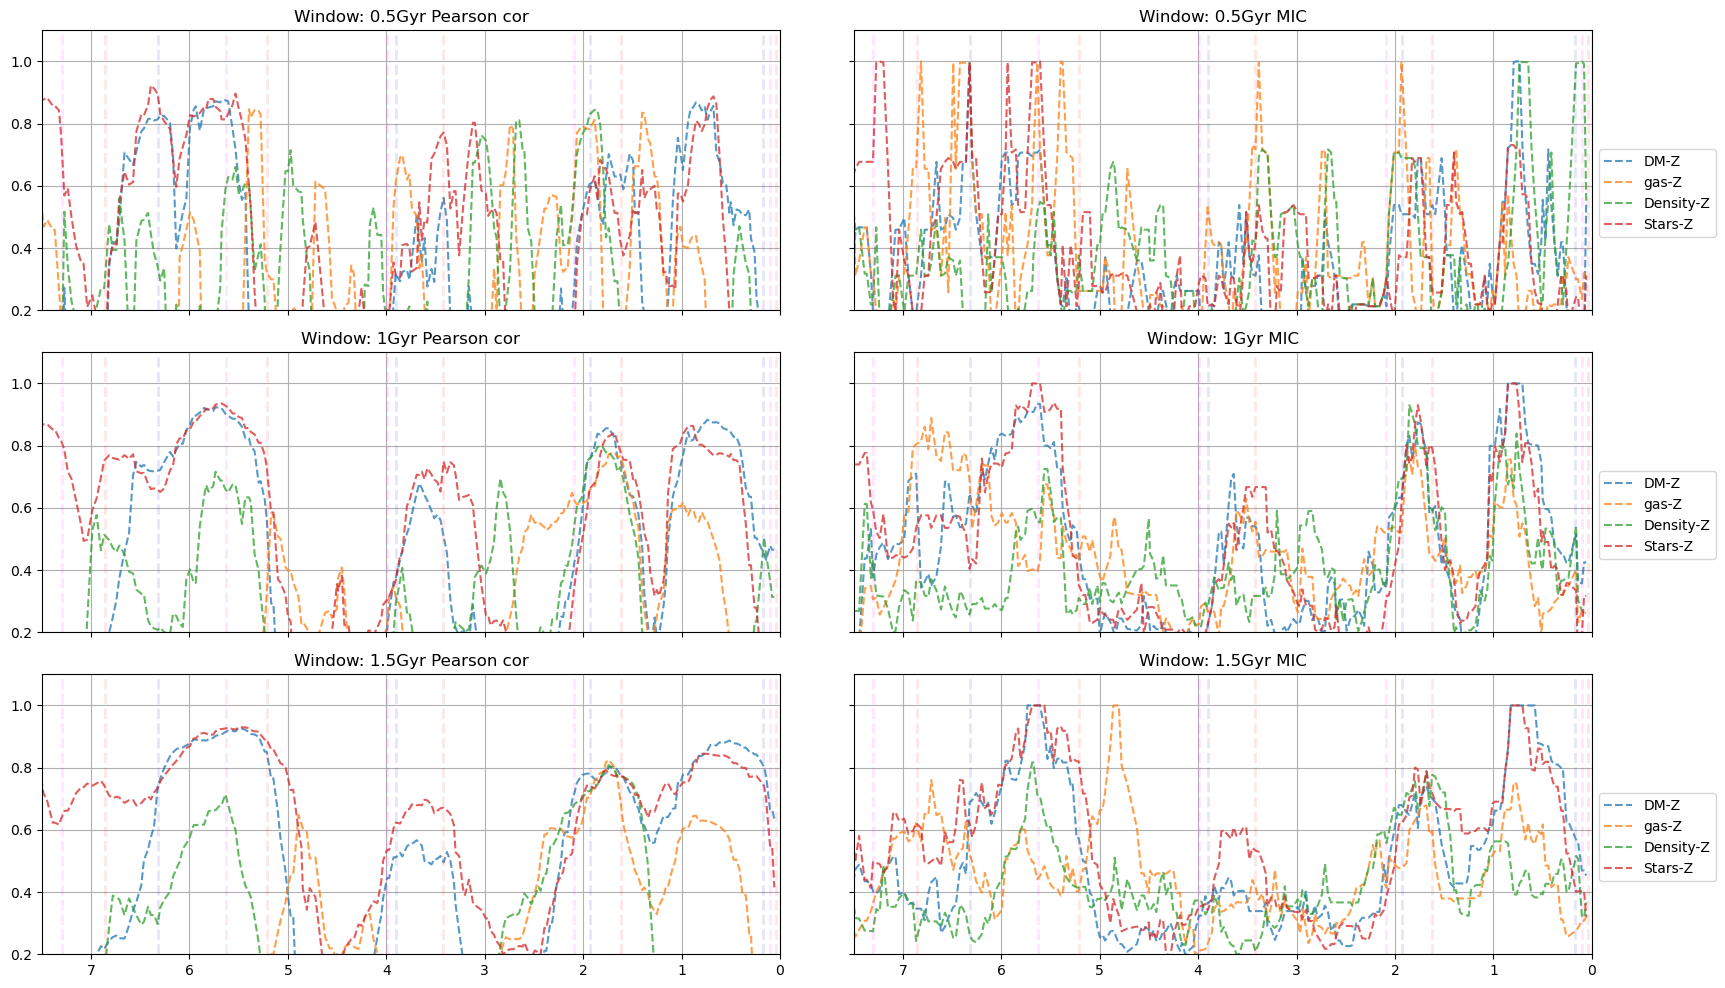

In [58]:
#variables = ["Z", "VZ", "density", "DM", "Gas","Stars","Satelites","All"]
#rings = ["5", "10", "15"]
#MIC_data = {}
#correlations = {}
#match = {}
#match = {}
#generation of dictionary
#for ring in rings:
#    for var1 in variables:
#        for var2 in variables:
#            MIC_data[f"{var1}_{var2}_{ring}"] = []
#            correlations[f"{var1}_{var2}_{ring}"] = []
#            match[f"{var1}_{var2}_{ring}"] = []
        #    match[f"{var1}_{var2}_{ring}"] = []
#window = 1
windows = [0.5,1,1.5]
#lookback = []

fig, ax = plt.subplots(len(windows),2, sharex=True, sharey=True,figsize = (20,4*len(windows)))
fig.subplots_adjust(hspace=0.15, wspace=0.1)
transp = 0.75
for i, window in enumerate(windows):
    variables = ["Z", "VZ", "density", "DM", "Gas","Stars","Satelites","All"]
    rings = ["5", "10", "15"]
    MIC_data = {}
    correlations = {}
    match = {}
    lookback = []
    #match = {}
    #generation of dictionary
    for ring in rings:
        for var1 in variables:
            for var2 in variables:
                MIC_data[f"{var1}_{var2}_{ring}"] = []
                correlations[f"{var1}_{var2}_{ring}"] = []
                match[f"{var1}_{var2}_{ring}"] = []
            #    match[f"{var1}_{var2}_{ring}"] = []
    for lb in df15["Lookback"]:
      #  print(lb)
        lookback.append(lb)
        df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
        df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
        df_w5 = df5[(df5["Lookback"]<lb + window/2)&(df5["Lookback"]>lb - window/2)]
        for ring in rings:
            for var1 in variables:
                for var2 in variables:
              #      print(f"calculatin in ring {ring}, variables {var1}, {var2}")
                    if ring == '5':
                        MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w5))
                        correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w5))
                        match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w5))
                   #     match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w5))
                    elif ring == '10':
                        MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w10))
                        correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w10))
                        match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                  #      match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                    elif ring == '15':
                        MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w15))
                        correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w15))
                        match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))
                 #       match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))


    ax[i,0].set_title(f"Window: {window}Gyr Pearson cor")
    #ax.plot(lookback,cor_all_Z_10,label = "All-Z")
    ax[i,0].plot(lookback,correlations["DM_Z_10"],label = "DM-Z",ls  = "--", alpha =transp)
    #ax[0].scatter(lookback,match["DM_Z_10"],marker = "x",label = "DM-Z")
    ax[i,0].plot(lookback,correlations["Gas_Z_10"],label = "gas-Z",ls  = "--", alpha =transp)
    #ax[0].scatter(lookback,match["Gas_Z_10"],marker = "x",label = "Gas-Z")
    ax[i,0].plot(lookback,correlations["density_Z_10"],label = "Density-Z",ls  = "--", alpha =transp)
    #ax[0].scatter(lookback,match["density_Z_10"],marker = "x",label = "Density-Z")
    ax[i,0].plot(lookback,correlations["Stars_Z_10"],label = "Stars-Z",ls  = "--", alpha =transp)
    #ax[0].scatter(lookback,match["Stars_Z_10"],marker = "x",label = "Stars-Z")

    ax[i,0].set_xlim(7.5,0)
    ax[i,0].set_ylim(0.2,1.1)
    ax[i,0].grid()
    #ax[0].legend(bbox_to_anchor = (1., 0.6))
    add_satellites(ax[i,0])
    ax[i,1].set_title(f"Window: {window}Gyr MIC")
    ax[i,1].plot(lookback,MIC_data["DM_Z_10"],label = "DM-Z",ls  = "--", alpha =transp)
    #ax[1].scatter(lookback,match["DM_Z_15"],marker = "x",label = "DM-Z")
    ax[i,1].plot(lookback,MIC_data["Gas_Z_10"],label = "gas-Z",ls  = "--", alpha =transp)
    #ax[1].scatter(lookback,match["Gas_Z_15"],marker = "x",label = "Gas-Z")
    ax[i,1].plot(lookback,MIC_data["density_Z_10"],label = "Density-Z",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data["Stars_Z_10"],label = "Stars-Z",ls  = "--", alpha =transp)


    ax[i,1].set_xlim(7.5,0)
    ax[i,1].set_ylim(0.2,1.1)
    add_satellites(ax[i,1])
    ax[i,1].grid()
    ax[i,1].legend(bbox_to_anchor = (1., 0.6))
 #   ax[i,1].set_xlabel('Lookback [Gyr]', fontsize = 12)
    #ax[1].set_ylabel('Spearman cor', fontsize = 12)
plt.savefig(path_results +"correlactions_windows.png", dpi = 100, bbox_inches='tight', facecolor = "white" )

Text(0.5, 0, 'Lookback [Gyr]')

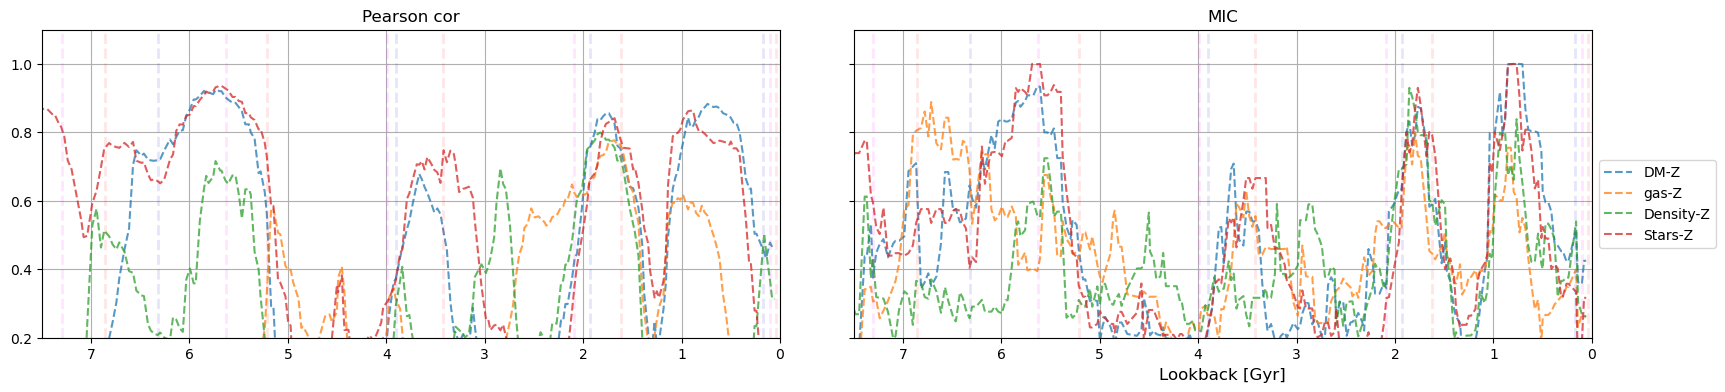

In [53]:
fig, ax = plt.subplots(len(windows),2, sharex=True, sharey=True,figsize = (20,4))
fig.subplots_adjust(hspace=0.15, wspace=0.1)
transp = 0.75
ax[0].set_title("Pearson cor")
#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[0].plot(lookback,correlations["DM_Z_10"],label = "DM-Z",ls  = "--", alpha =transp)
#ax[0].scatter(lookback,match["DM_Z_10"],marker = "x",label = "DM-Z")
ax[0].plot(lookback,correlations["Gas_Z_10"],label = "gas-Z",ls  = "--", alpha =transp)
#ax[0].scatter(lookback,match["Gas_Z_10"],marker = "x",label = "Gas-Z")
ax[0].plot(lookback,correlations["density_Z_10"],label = "Density-Z",ls  = "--", alpha =transp)
#ax[0].scatter(lookback,match["density_Z_10"],marker = "x",label = "Density-Z")
ax[0].plot(lookback,correlations["Stars_Z_10"],label = "Stars-Z",ls  = "--", alpha =transp)
#ax[0].scatter(lookback,match["Stars_Z_10"],marker = "x",label = "Stars-Z")

ax[0].set_xlim(7.5,0)
ax[0].set_ylim(0.2,1.1)
ax[0].grid()
#ax[0].legend(bbox_to_anchor = (1., 0.6))
add_satellites(ax[0])
ax[1].set_title("MIC")
ax[1].plot(lookback,MIC_data["DM_Z_10"],label = "DM-Z",ls  = "--", alpha =transp)
#ax[1].scatter(lookback,match["DM_Z_15"],marker = "x",label = "DM-Z")
ax[1].plot(lookback,MIC_data["Gas_Z_10"],label = "gas-Z",ls  = "--", alpha =transp)
#ax[1].scatter(lookback,match["Gas_Z_15"],marker = "x",label = "Gas-Z")
ax[1].plot(lookback,MIC_data["density_Z_10"],label = "Density-Z",ls  = "--", alpha =transp)
ax[1].plot(lookback,MIC_data["Stars_Z_10"],label = "Stars-Z",ls  = "--", alpha =transp)
#ax[1].scatter(lookback,match["density_Z_15"],marker = "x",label = "density-Z")

ax[1].set_xlim(7.5,0)
ax[1].set_ylim(0.2,1.1)
add_satellites(ax[1])
ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.6))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
#ax[1].set_ylabel('Spearman cor', fontsize = 12)
#plt.show()   
#plt.savefig("results/correlations_Z.png", dpi = 100, facecolor = "white")